<a href="https://colab.research.google.com/github/jessigatma/Globant_Exercises/blob/main/diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Diabetes

## 1. Problema/ Caso de estudio

**Objetivo**: Clasificar  la salida paciente-hospital

En el siguiente link se encuentran datos de 10 años de cuidados clínicos en 130 hospitales de Estados Unidos y redes integradas. 

Las características mencionan el ingreso al hospital de los pacientes, si es diabético, el número de días de hospitalización, pruebas de laborator, la administración de medicamentos y algunos detalles personales del paciente como edad, peso, raza, etc.

El target del dataset tiene 3 valores:
1. No readmisión
2. Readmisión en menos de 30 días
3. Readmisión en más de 30 días


## 2. Obtención de Datos

In [1]:
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df_diabetes =  pd.read_csv('/content/drive/MyDrive/diabetic_data.csv')
df_diabetes.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


## 3. Reconocimiento de los datos 

In [4]:
print('Tamaño de Dataframe: ', df_diabetes.shape)
print('columnas: ', df_diabetes.columns)

Tamaño de Dataframe:  (101766, 50)
columnas:  Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')


Son 50 columnas y 101766 registros. En la siguiente celda se observará cuantos valores nulos se tienen y el tipo de dato de cada columna

In [5]:
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

No existen valores nulos!

A continuación, se verá la descripción de cada una de las variables y si existen algunos valores atípicos.

In [6]:
df_diabetes.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
encounter_id,101766.0,NaN,NaN,NaN,165201645.622978,102640295.983457,12522.0,84961194.0,152388987.0,230270887.5,443867222.0
patient_nbr,101766.0,NaN,NaN,NaN,54330400.694947,38696359.346534,135.0,23413221.0,45505143.0,87545949.75,189502619.0
race,101766,6,Caucasian,76099,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,101766,3,Female,54708,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,101766,10,[70-80),26068,NaN,NaN,NaN,NaN,NaN,NaN,NaN
weight,101766,10,?,98569,NaN,NaN,NaN,NaN,NaN,NaN,NaN
admission_type_id,101766.0,NaN,NaN,NaN,2.024006,1.445403,1.0,1.0,1.0,3.0,8.0
discharge_disposition_id,101766.0,NaN,NaN,NaN,3.715642,5.280166,1.0,1.0,1.0,4.0,28.0
admission_source_id,101766.0,NaN,NaN,NaN,5.754437,4.064081,1.0,1.0,7.0,7.0,25.0
time_in_hospital,101766.0,NaN,NaN,NaN,4.395987,2.985108,1.0,2.0,4.0,6.0,14.0


¿Todas las columnas arrojan información útil?¿Hay algunas de las que se puede prescindir?

In [7]:
for columna in df_diabetes.columns:
    print(f'=============== {columna} ===============')
    print(df_diabetes[columna].value_counts(normalize=True))
    print('===============================================')

=============== encounter_id ===============
2278392      0.00001
190792044    0.00001
190790070    0.00001
190789722    0.00001
190786806    0.00001
              ...   
106665324    0.00001
106657776    0.00001
106644876    0.00001
106644474    0.00001
443867222    0.00001
Name: encounter_id, Length: 101766, dtype: float64
=============== patient_nbr ===============
88785891     0.000393
43140906     0.000275
1660293      0.000226
88227540     0.000226
23199021     0.000226
               ...   
11005362     0.000010
98252496     0.000010
1019673      0.000010
13396320     0.000010
175429310    0.000010
Name: patient_nbr, Length: 71518, dtype: float64
=============== race ===============
Caucasian          0.747784
AfricanAmerican    0.188766
?                  0.022336
Hispanic           0.020017
Other              0.014799
Asian              0.006299
Name: race, dtype: float64
=============== gender ===============
Female             0.537586
Male               0.462384
Unknown/Inv

¿Cuántos pacientes vuelven a ingresar? ¿Cuál es el número máximo de ingreso al hospital de un paciente?

In [8]:
df_diabetes['patient_nbr'].value_counts()

88785891     40
43140906     28
1660293      23
88227540     23
23199021     23
             ..
11005362      1
98252496      1
1019673       1
13396320      1
175429310     1
Name: patient_nbr, Length: 71518, dtype: int64

In [9]:
df_diabetes[df_diabetes['patient_nbr']==43140906]

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
40232,125048580,43140906,Caucasian,Female,[10-20),?,3,1,1,4,...,No,Down,No,No,No,No,No,Ch,Yes,<30
40805,126574968,43140906,Caucasian,Female,[10-20),?,1,1,7,1,...,No,Steady,No,No,No,No,No,No,Yes,<30
41140,127455774,43140906,Caucasian,Female,[10-20),?,1,1,7,2,...,No,Down,No,No,No,No,No,Ch,Yes,<30
41560,128462484,43140906,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Steady,No,No,No,No,No,No,Yes,>30
44802,138303666,43140906,Caucasian,Female,[10-20),?,1,1,7,2,...,No,No,No,No,No,No,No,No,No,>30
54281,158221548,43140906,Caucasian,Female,[10-20),?,1,1,7,1,...,No,Up,No,No,No,No,No,Ch,Yes,>30
70538,202607562,43140906,Caucasian,Female,[20-30),?,1,1,7,2,...,No,Down,No,No,No,No,No,Ch,Yes,<30
70881,204233946,43140906,Caucasian,Female,[20-30),?,1,1,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,<30
71226,205970568,43140906,Caucasian,Female,[20-30),?,1,1,7,2,...,No,Down,No,No,No,No,No,Ch,Yes,<30
71730,208582026,43140906,Caucasian,Female,[20-30),?,1,1,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,<30


La variable de "Weight" sería muy útil si se habla de Diabetes, sin embargo más del 90% de los datos no tiene este registro. Por lo que se puede prescindir de esta variable, pues no lograría dar una información útil al relacionar este valor con otras variables.

In [10]:
df_diabetes['weight'].value_counts(normalize=True) 

?            0.968585
[75-100)     0.013128
[50-75)      0.008814
[100-125)    0.006142
[125-150)    0.001425
[25-50)      0.000953
[0-25)       0.000472
[150-175)    0.000344
[175-200)    0.000108
>200         0.000029
Name: weight, dtype: float64

La variable 'medical_speciality' y 'payer_code' también tiene poca información que al obtener los resultados podría sesgarlos.

In [11]:
df_diabetes['medical_specialty'].value_counts(normalize = True)

?                                0.490822
InternalMedicine                 0.143810
Emergency/Trauma                 0.074337
Family/GeneralPractice           0.073109
Cardiology                       0.052591
                                   ...   
SportsMedicine                   0.000010
Speech                           0.000010
Perinatology                     0.000010
Neurophysiology                  0.000010
Pediatrics-InfectiousDiseases    0.000010
Name: medical_specialty, Length: 73, dtype: float64

Con las variables 'max_glu_serum' y 'A1Cresult', ambas tienen None con más del 80% de los datos. Como no se tiene información se prefiere omitir estas variables.

In [12]:
df_diabetes['max_glu_serum'].value_counts(normalize = True)

None    0.947468
Norm    0.025519
>200    0.014592
>300    0.012421
Name: max_glu_serum, dtype: float64

In [13]:
df_diabetes['A1Cresult'].value_counts(normalize = True)

None    0.832773
>8      0.080734
Norm    0.049034
>7      0.037458
Name: A1Cresult, dtype: float64

 ### Proporción de Readmisión

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns


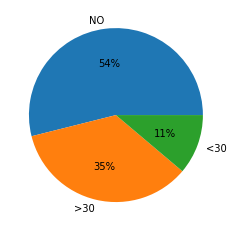

In [15]:
plt.pie(df_diabetes['readmitted'].value_counts().values, labels=df_diabetes['readmitted'].value_counts().index, autopct='%.0f%%')

plt.show()

In [16]:
d = df_diabetes[df_diabetes['readmitted']=='NO']
d['gender'].value_counts()

Female             29038
Male               25823
Unknown/Invalid        3
Name: gender, dtype: int64

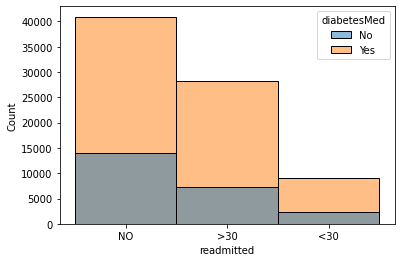

In [17]:
sns.histplot(data=df_diabetes, hue='diabetesMed', x='readmitted')

## 4. Limpieza de Datos

Se tienen 50 columnas en total y habrá otras que por falta de información se eliminarán. Sin embargo, también hay que hacel algunos cambios en el tipo de datos. Si los datos categóricos son ordinales ó nominales y convertir otros en valores dummy.

Las columnas que se decidieron eliminar son: weight, payer_code, medical_specialty, max_glu_serum y A1Cresult

In [18]:
delete_list = ['weight', 'payer_code', 'medical_specialty', 'max_glu_serum', 'A1Cresult']
df_diabetes.drop(delete_list,axis=1, inplace=True)
df_diabetes.shape

(101766, 45)

Se eliminará la columna patient_nbr, y se considerará la llegada del paciente como una nuevo registro

In [19]:
df_diabetes.drop(['patient_nbr','encounter_id'], axis=1,inplace=True)
df_diabetes.shape

(101766, 43)

Hay que notar que existen variables categóricas y que algunas son ordinales.
La variable ordinal es: **age** 

Con OrdinalEncoder de scikit learn se convierten en ordinales

In [20]:
df_diabetes['age'].unique()

array(['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)',
       '[60-70)', '[70-80)', '[80-90)', '[90-100)'], dtype=object)

In [21]:
from sklearn.preprocessing import OrdinalEncoder

# Creamos el codificador indicandole el orden de la variables
encoder = OrdinalEncoder(categories=[df_diabetes['age'].unique()])
# Ajustamos el codificador con la variable age y la transformamos
encoder.fit(df_diabetes[['age']])
df_diabetes["age-encoded"] = encoder.transform(df_diabetes[['age']])

In [22]:
df_diabetes.drop(['age'],axis=1,inplace=True)

También existen variables nominales: Las variables nominales son: 'race', 'gender', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 
       'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed'

In [23]:
dummies = pd.get_dummies(df_diabetes[['gender','metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', \
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone','tolazamide', 'examide', 'citoglipton', 'insulin','glyburide-metformin', 'glipizide-metformin',\
       'glimepiride-pioglitazone', 'metformin-rosiglitazone','metformin-pioglitazone', 'change', 'diabetesMed']], drop_first = True)
dummies.head()

,gender_Male,gender_Unknown/Invalid,metformin_No,metformin_Steady,metformin_Up,repaglinide_No,repaglinide_Steady,repaglinide_Up,nateglinide_No,nateglinide_Steady,...,insulin_Up,glyburide-metformin_No,glyburide-metformin_Steady,glyburide-metformin_Up,glipizide-metformin_Steady,glimepiride-pioglitazone_Steady,metformin-rosiglitazone_Steady,metformin-pioglitazone_Steady,change_No,diabetesMed_Yes
0,0,0,1,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,1,0,0,1,0,0,1,0,...,1,1,0,0,0,0,0,0,0,1
2,0,0,1,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,1
3,1,0,1,0,0,1,0,0,1,0,...,1,1,0,0,0,0,0,0,0,1
4,1,0,1,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1


In [24]:
df_diabetes.drop(['race', 'gender', 'diag_1', 'diag_2', 'diag_3', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', \
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone','tolazamide', 'examide', 'citoglipton', 'insulin','glyburide-metformin', 'glipizide-metformin',\
      'glimepiride-pioglitazone', 'metformin-rosiglitazone','metformin-pioglitazone', 'change', 'diabetesMed'],axis=1, inplace=True)


In [25]:
df_diabetes.shape

(101766, 13)

Se concatenan los data frames que se transformaron y queda un nuevo DF llamado df_diabetes_clean

In [26]:
df_diabetes_clean = pd.concat([df_diabetes,dummies],axis=1)
print(f'tamaño del data frame: {df_diabetes_clean.shape}')

tamaño del data frame: (101766, 65)


In [27]:
df_diabetes_clean.head()

,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,...,insulin_Up,glyburide-metformin_No,glyburide-metformin_Steady,glyburide-metformin_Up,glipizide-metformin_Steady,glimepiride-pioglitazone_Steady,metformin-rosiglitazone_Steady,metformin-pioglitazone_Steady,change_No,diabetesMed_Yes
0,6,25,1,1,41,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,1,1,7,3,59,0,18,0,0,0,...,1,1,0,0,0,0,0,0,0,1
2,1,1,7,2,11,5,13,2,0,1,...,0,1,0,0,0,0,0,0,1,1
3,1,1,7,2,44,1,16,0,0,0,...,1,1,0,0,0,0,0,0,0,1
4,1,1,7,1,51,0,8,0,0,0,...,0,1,0,0,0,0,0,0,0,1


## 5. Modelar Datos

El objetivo del proyecto es clasificar a los que vuelven al hospital o no, es decir, la columna 'Readmitted'. Debido a que una vez que se tenga el resultado y ya que se trata sobre la salud, sería muy bueno que se supiera cuáles son los motivos de volver al hospital o no. Es por eso que se decide un modelo de Árbol, el Árbol de Decisión

En este punto, donde los datos estan listos para entrar a un modelo, se debe también dividir los datos para el entrenamiento y el testeo del modelo

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
y = df_diabetes_clean['readmitted']
X = df_diabetes_clean.drop(['readmitted'],axis=1)


In [30]:

X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=256)

Después de obtener los subconjuntos para entrenar y testear, se hará una función que nos permita de manera aleatoria crear árboles de decisión con distintos parámetros, hasta encontrar el óptimo, en este caso mayor a 0.57 (después de varios intentos, este fue la mejor accuracy)

In [33]:
import random

def get_random_params():
    return {
        "max_depth": random.choice(list(range(1, 100, 1)) + [None]),
        "criterion": random.choice(['gini','entropy'])
    }
params = [get_random_params() for i in range(1000)]

In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

for i in range(1000):
    diabetesTree = DecisionTreeClassifier(max_depth=params[i]['max_depth'],criterion=params[i]['criterion'])
    diabetesTree.fit(X_trainset,y_trainset)
    y_pred = diabetesTree.predict(X_testset)
    accur = metrics.accuracy_score(y_testset, y_pred)
    if accur > 0.57:
        break
print(diabetesTree)
print("DecisionTrees's Accuracy: ", accur)

DecisionTreeClassifier(max_depth=6)
DecisionTrees's Accuracy:  0.5764493940386505


Definitivamente no es el mejor resultado, volvería al dataframe de entrada para eliminar algunas variables como los medicamentos, que varios tienen solo 1 registro distinto. 

Aunque por otro lado, también consideraría usar otro modelo, como un Random Forest ó un XG-Boost, que pudiera al menos decir, los valores que más afectan al reingreso al hospital. 

In [36]:
from six import StringIO
import pydot
import matplotlib.image as mpimg
from sklearn import tree
from IPython.display import Image
%matplotlib inline 

In [37]:
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data
feature_names = X.columns
dot_data = export_graphviz(diabetesTree,
                           feature_names=feature_names)

graph = graph_from_dot_data(dot_data)
graph.write_png('tree.png')

True

/content/tree.png

En el árbol se puede observar cuáles son los valores que más participan en el reingreso al hospital. Número de pacientes y alta disposición son de los valores que más afectan al target, también afectan el número de diagnósticos y la edad y el número de procedimientos de laboratorio. 

Al observar los valores de los resultados en el árbol, no se puede interpretar con claridad cual sería la clasificación y esto se puede deducir desde el resultado del accuracy, sin embargo, sí podríamos darnos cuenta de algunos resultados como que el tipo de admisión ó si está medicada con diabetes puede hacer que el reingreso sea mayor a los 30 días 